In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.io import arff
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls



FOLDS =10
%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:

df = pd.read_csv ('Complete_extracted_dataset.csv')
df.head(-5)

,File_name,img_type,meanI,meanJ,taoI,taoJ,kontras,Homogenitas,Correlation,LiveN,Occi,Hippo,Temporal,Thalmus,Insular,Frontal lobe,Alz
0,nonDem0.jpg,watershed,49.750567,49.750567,63.881038,63.881038,466.675472,0.589547,0.940673,18795,1997,775,1862,639,429,2416,0
1,nonDem1.jpg,watershed,40.152617,40.152617,45.258108,45.258108,192.453014,0.604307,0.951487,19481,1802,737,2489,176,976,2295,0
2,nonDem10.jpg,watershed,53.795373,53.795373,69.168492,69.168492,503.536849,0.596791,0.944802,18987,2369,876,1383,703,363,2900,0
3,nonDem100.jpg,watershed,49.181275,49.181275,62.894015,62.894015,473.472350,0.588528,0.938100,18804,2200,837,1855,576,365,2689,0
4,nonDem101.jpg,watershed,38.974283,38.974283,43.151717,43.151717,143.828692,0.619576,0.960502,19602,1734,606,2784,120,1053,2300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,moderateDem47.jpg,watershed,50.102247,50.102247,68.078853,68.078853,524.466478,0.586579,0.936426,16747,1524,822,804,642,23,2358,1
544,moderateDem48.jpg,watershed,42.676465,42.676465,60.170753,60.170753,477.563575,0.592347,0.929341,15769,1030,910,1036,63,18,2023,1
545,moderateDem49.jpg,watershed,50.372976,50.372976,68.944301,68.944301,521.659842,0.589631,0.936998,16515,1430,793,698,707,13,2453,1
546,moderateDem5.jpg,watershed,49.324561,49.324561,65.003538,65.003538,529.765974,0.566001,0.932261,18164,2130,729,823,670,110,2600,1


In [ ]:
df.describe()

,meanI,meanJ,taoI,taoJ,kontras,Homogenitas,Correlation,LiveN,Occi,Hippo,Temporal,Thalmus,Insular,Frontal lobe,Alz
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,47.725137,47.725137,60.906672,60.906672,449.896941,0.583456,0.937911,18673.314647,2007.148282,737.531646,1455.650995,451.325497,279.292948,2630.607595,0.094033
std,3.895374,3.895374,6.932136,6.932136,113.141600,0.014506,0.009039,767.683044,266.695641,110.450573,524.169415,196.649717,194.571363,208.887685,0.292138
min,36.828694,36.828694,39.290787,39.290787,72.752213,0.561763,0.916367,15441.000000,927.000000,392.000000,667.000000,0.000000,13.000000,1915.000000,0.000000
25%,45.251838,45.251838,58.839437,58.839437,429.375550,0.574578,0.932261,18299.000000,1841.000000,671.000000,1142.000000,295.000000,179.000000,2506.000000,0.000000
50%,48.324826,48.324826,62.514726,62.514726,485.333906,0.580905,0.937721,18737.000000,2037.000000,754.000000,1321.000000,470.000000,234.000000,2650.000000,0.000000
75%,50.677026,50.677026,65.634807,65.634807,521.894455,0.587906,0.942034,19178.000000,2191.000000,814.000000,1541.000000,604.000000,313.000000,2777.000000,0.000000
max,55.075385,55.075385,71.570278,71.570278,610.220914,0.653186,0.975831,20509.000000,2535.000000,980.000000,4122.000000,841.000000,1147.000000,3158.000000,1.000000


In [ ]:
cm=df.corr()

In [ ]:
cm[np.abs(cm)<0.2]=0

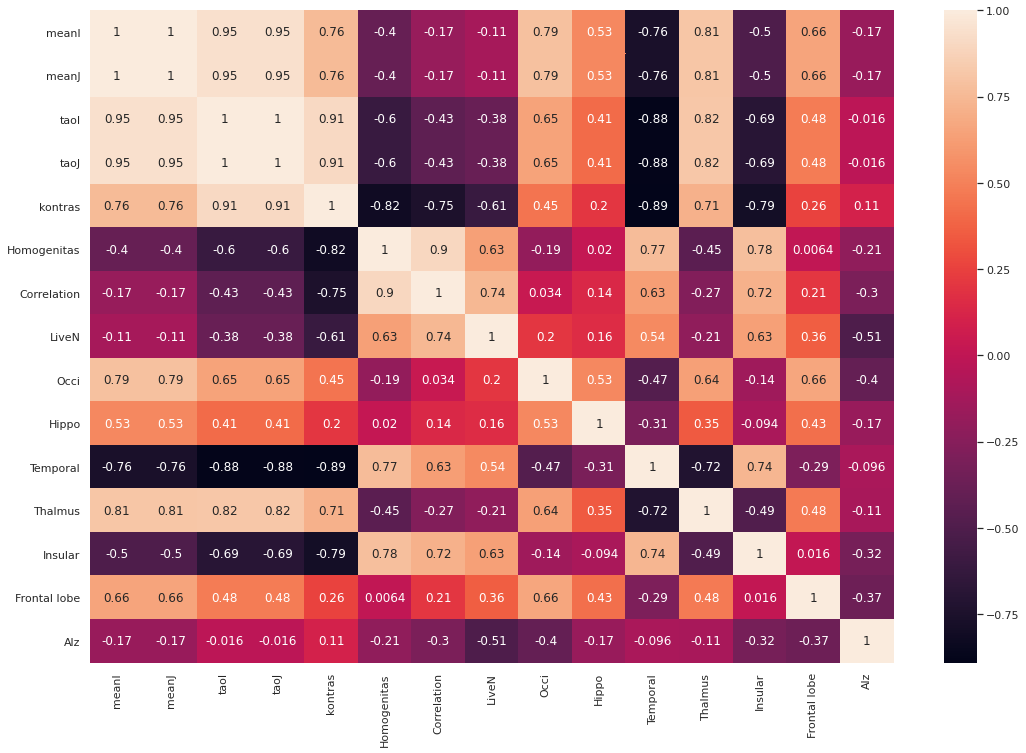

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(cm,annot=True)

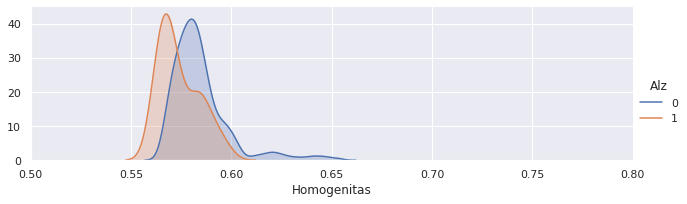

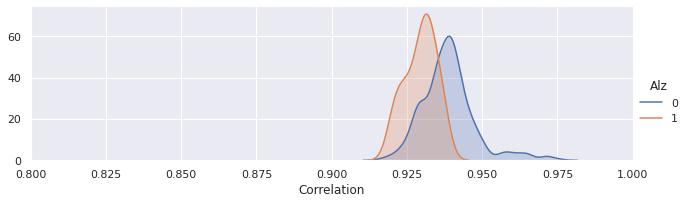

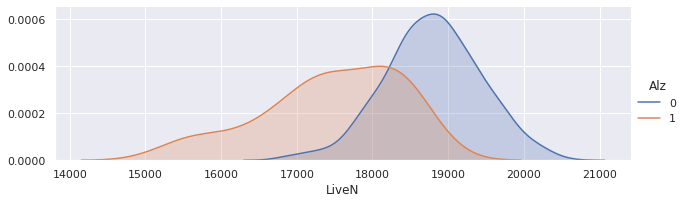

<Figure size 1440x1440 with 0 Axes>

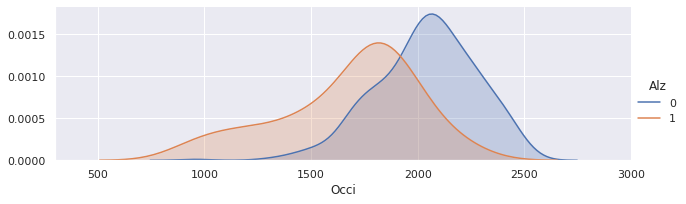

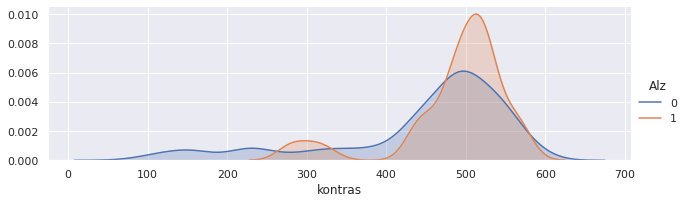

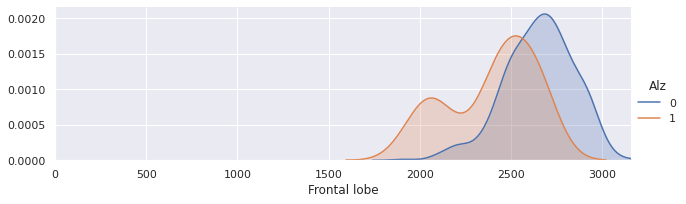

In [ ]:
#Graphs of contributing features. 
facet= sns.FacetGrid(df,hue="Alz", aspect=3)
facet.map(sns.kdeplot,'Homogenitas',shade= True)

facet.add_legend()
plt.xlim(0.5,0.8)

facet= sns.FacetGrid(df,hue="Alz", aspect=3)
facet.map(sns.kdeplot,'Correlation',shade= True)
facet.add_legend()
plt.xlim(0.8,1)

facet= sns.FacetGrid(df,hue="Alz", aspect=3)
facet.map(sns.kdeplot,'LiveN',shade= True)
plt.figure(figsize=(20,20))
facet.add_legend()

facet= sns.FacetGrid(df,hue="Alz", aspect=3)
facet.map(sns.kdeplot,'Occi',shade= True)
facet.add_legend()
plt.xlim(300,3000)

facet= sns.FacetGrid(df,hue="Alz", aspect=3)
facet.map(sns.kdeplot,'kontras',shade= True)
facet.add_legend()


facet= sns.FacetGrid(df,hue="Alz", aspect=3)
facet.map(sns.kdeplot,'Frontal lobe',shade= True)
facet.set(xlim=(0, df['Frontal lobe'].max()))
facet.add_legend()




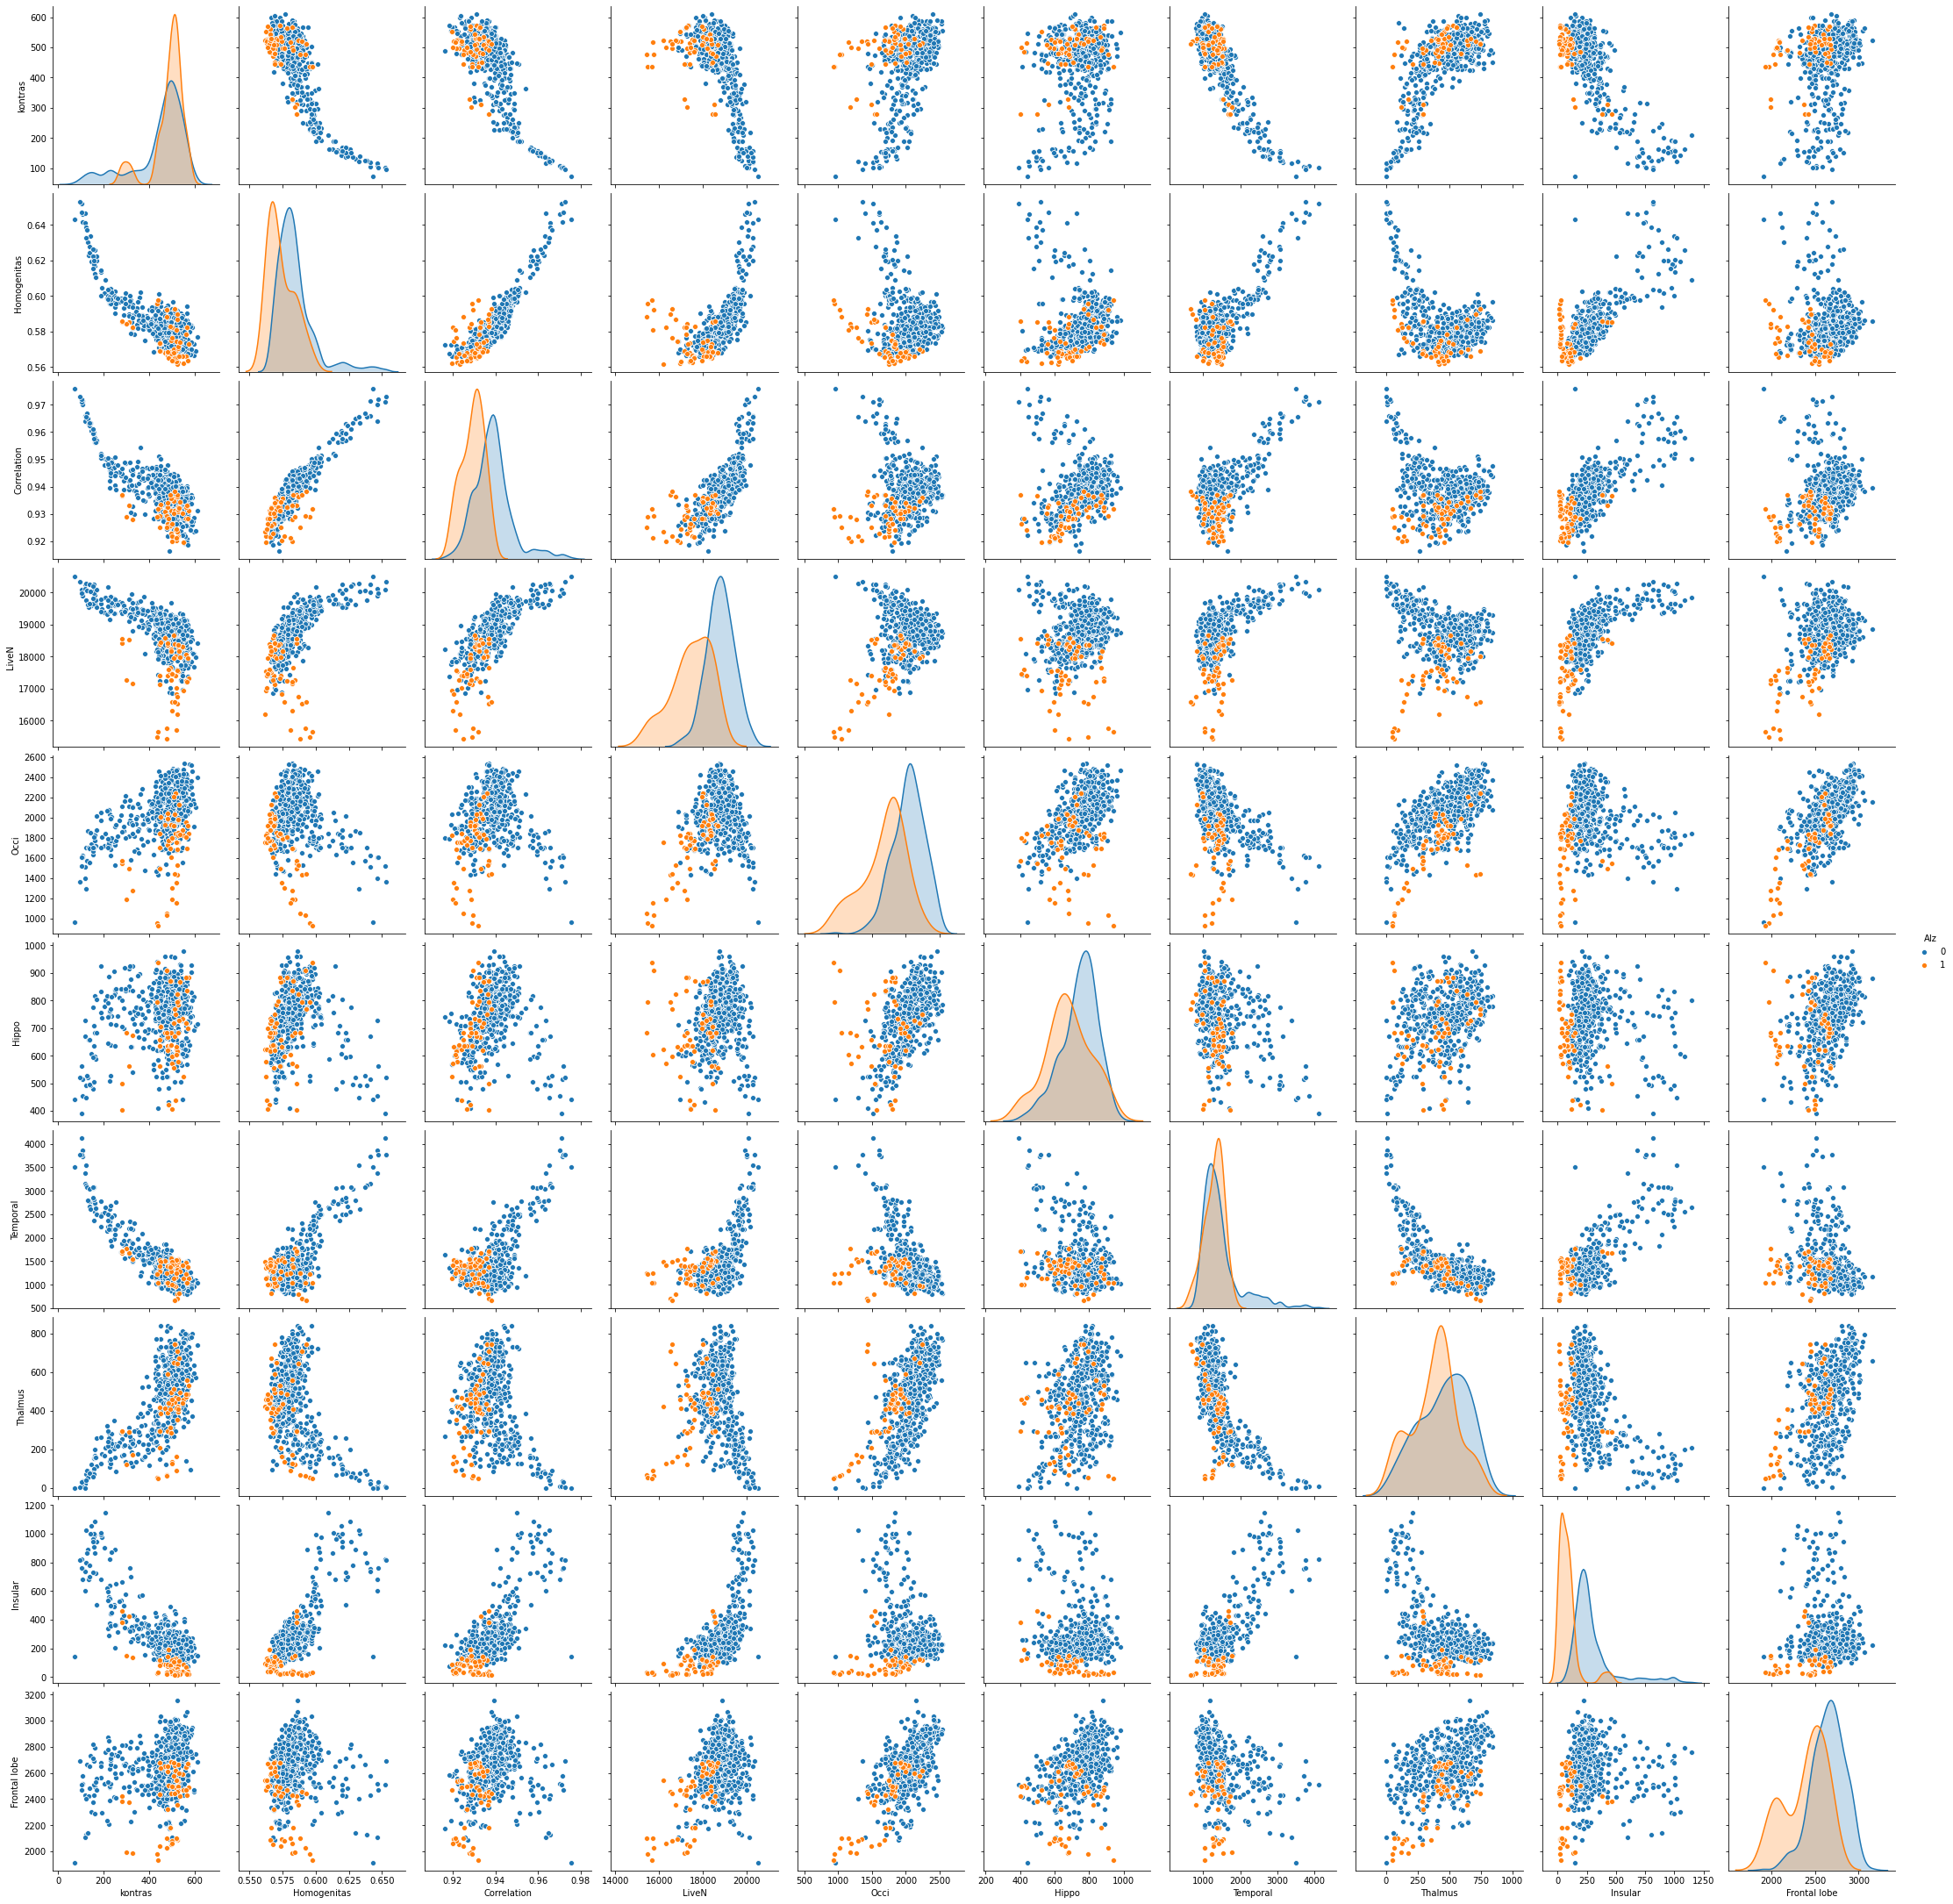

In [ ]:
sns.pairplot(df, hue='Alz', height=3, aspect=1);

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report 




In [ ]:
from sklearn.metrics import accuracy_score
Y = df['Alz'].values # Target for the model
X = df[['Homogenitas','Correlation','LiveN','Occi','Insular','Frontal lobe']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=1)
#print(X_test)


In [ ]:
def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(12,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="OrRd")
    sns.set(font_scale=1.0)
    plt.savefig(filename)



0.9568345323741008
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       125
           1       0.90      0.64      0.75        14

    accuracy                           0.96       139
   macro avg       0.93      0.82      0.86       139
weighted avg       0.96      0.96      0.95       139

Specificity :  0.6428571428571429
Sensitivity :  0.992


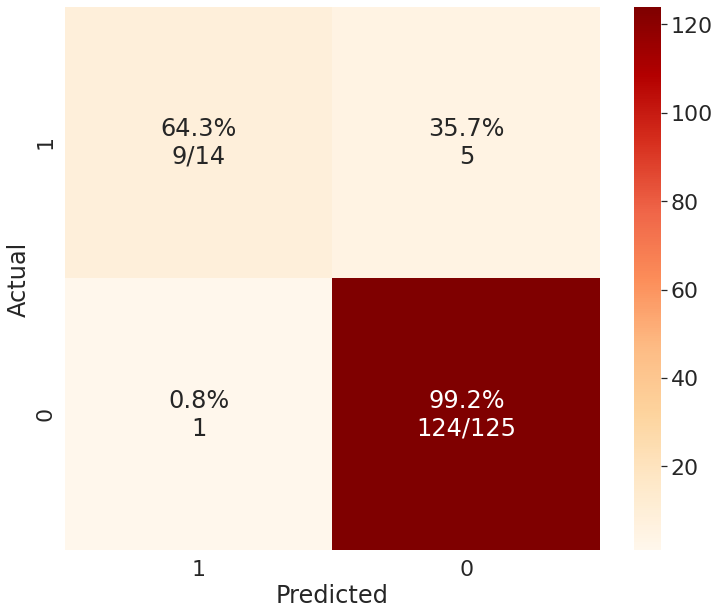

In [ ]:
#Logistic Regression
model = LogisticRegression().fit(X_trainval, Y_trainval)
PredictedOutput = model.predict(X_test)
cfm=confusion_matrix(Y_test, PredictedOutput)
print((cfm[0][0]+cfm[1][1])/(cfm[0][0]+cfm[1][1]+cfm[0][1]+cfm[1][0]))
print(classification_report(Y_test, PredictedOutput))
specificity1 = cfm[1,1]/(cfm[1,0]+cfm[1,1])
print('Specificity : ', specificity1)
sensitivity1 = cfm[0,0]/(cfm[0,0]+cfm[0,1])
print('Sensitivity : ', sensitivity1 )

sign = [1,0]
cm_analysis(Y_test, PredictedOutput, 'lr_cm', sign)

0.9424460431654677
0.9424460431654677
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       125
           1       0.80      0.57      0.67        14

    accuracy                           0.94       139
   macro avg       0.88      0.78      0.82       139
weighted avg       0.94      0.94      0.94       139

Specificity :  0.5714285714285714
Sensitivity :  0.984


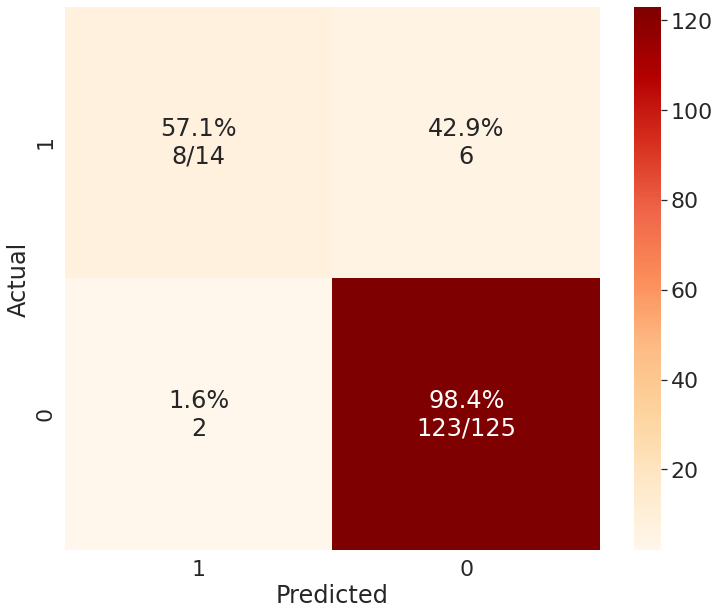

In [ ]:
#Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_trainval, Y_trainval)
print(tree_clf.score(X_test, Y_test))
Y_predicted = tree_clf.predict(X_test)

cfm=confusion_matrix(Y_test, Y_predicted)
print((cfm[0][0]+cfm[1][1])/(cfm[0][0]+cfm[1][1]+cfm[0][1]+cfm[1][0]))

print(classification_report(Y_test, Y_predicted))
specificity1 = cfm[1,1]/(cfm[1,0]+cfm[1,1])
print('Specificity : ', specificity1)
sensitivity1 = cfm[0,0]/(cfm[0,0]+cfm[0,1])
print('Sensitivity : ', sensitivity1 )

sign = [1,0]
cm_analysis(Y_test, Y_predicted, 'lr_cm', sign)

0.9640287769784173
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       125
           1       1.00      0.64      0.78        14

    accuracy                           0.96       139
   macro avg       0.98      0.82      0.88       139
weighted avg       0.97      0.96      0.96       139

Specificity :  0.6428571428571429
Sensitivity :  1.0


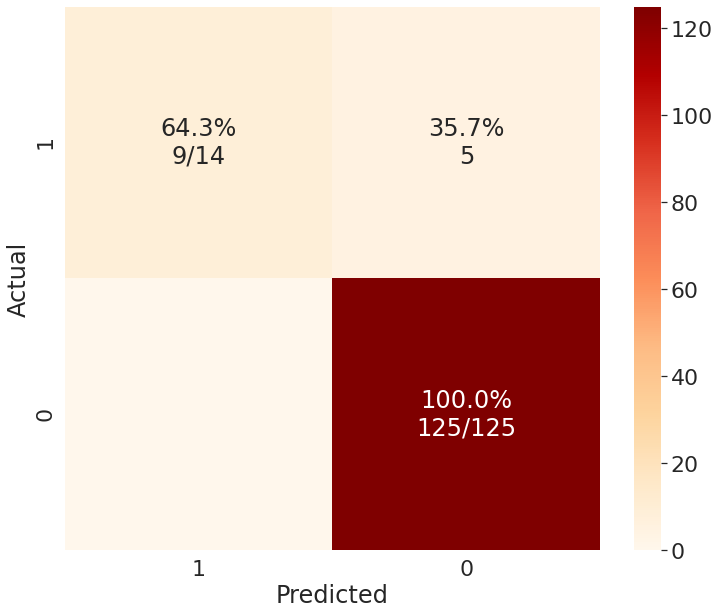

In [ ]:
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_trainval,Y_trainval)
melb_preds = forest_model.predict(X_test)
#print(melb_preds)
cfm=confusion_matrix(Y_test, melb_preds)
print((cfm[0][0]+cfm[1][1])/(cfm[0][0]+cfm[1][1]+cfm[0][1]+cfm[1][0]))
#print(classification_report(Y_test, melb_preds))


print(classification_report(Y_test, melb_preds))
specificity1 = cfm[1,1]/(cfm[1,0]+cfm[1,1])
print('Specificity : ', specificity1)
sensitivity1 = cfm[0,0]/(cfm[0,0]+cfm[0,1])
print('Sensitivity : ', sensitivity1 )

    
sign = [1,0]
cm_analysis(Y_test, melb_preds, 'lr_cm', sign)



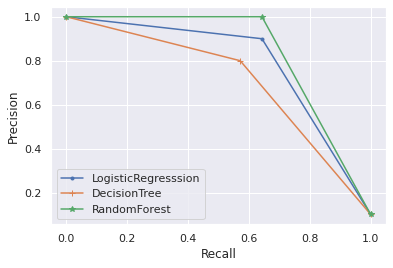

In [ ]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

rfprecision,rfrecall,rfthresholds=precision_recall_curve(Y_test,melb_preds)
dtprecision,dtrecall,dtthresholds=precision_recall_curve(Y_test,Y_predicted)
lrprecision,lrrecall,lrthresholds=precision_recall_curve(Y_test,PredictedOutput)

pyplot.plot(lrrecall, lrprecision, marker='.', label='LogisticRegresssion')
pyplot.plot(dtrecall, dtprecision, marker='+', label='DecisionTree')
pyplot.plot(rfrecall, rfprecision, marker='*', label='RandomForest')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

sns.set(font_scale=1.0)

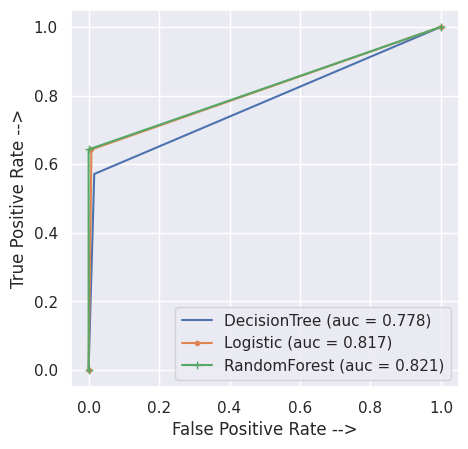

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, PredictedOutput)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(Y_test, Y_predicted)
auc_svm = auc(svm_fpr, svm_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(Y_test, melb_preds)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='DecisionTree (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, marker='+', label='RandomForest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()
sns.set(font_scale=1.0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
from sklearn.model_selection import cross_val_score


In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=10)

array([0.91111111, 0.93888889, 0.89444444, 0.86666667, 0.94444444,
       0.97222222, 0.97777778, 0.94972067, 0.8603352 , 0.94413408])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=10)

array([0.90555556, 0.97222222, 0.90555556, 0.93888889, 0.97222222,
       0.97222222, 0.98333333, 0.95530726, 0.93296089, 0.9273743 ])

In [ ]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores1)

0.9387771570453134

In [ ]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=60),digits.data, digits.target, cv=10)
np.average(scores2)

0.9471291123525759

In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=70),digits.data, digits.target, cv=10)
np.average(scores3)

0.9504624456859092

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=100),digits.data, digits.target, cv=10)
np.average(scores4)

0.9515859714463065

In [ ]:
scores5 = cross_val_score(RandomForestClassifier(n_estimators=120),digits.data, digits.target, cv=10)
np.average(scores5)

0.9493606455617629

In [ ]:
sns.set(font_scale=1.0)